In [2]:
import torch

from clipseg.models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt


# load model
model = CLIPDensePredT(version="ViT-B/16", reduce_dim=64)
model.eval()

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(
    torch.load("clipseg/weights/rd64-uni.pth", map_location=torch.device("cuda")),
    strict=False,
)

c:\Users\yitao\.conda\envs\resProj\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yitao\.conda\envs\resProj\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\yitao\.conda\envs\resProj\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


_IncompatibleKeys(missing_keys=['clip_model.positional_embedding', 'clip_model.text_projection', 'clip_model.logit_scale', 'clip_model.visual.class_embedding', 'clip_model.visual.positional_embedding', 'clip_model.visual.proj', 'clip_model.visual.conv1.weight', 'clip_model.visual.ln_pre.weight', 'clip_model.visual.ln_pre.bias', 'clip_model.visual.transformer.resblocks.0.attn.in_proj_weight', 'clip_model.visual.transformer.resblocks.0.attn.in_proj_bias', 'clip_model.visual.transformer.resblocks.0.attn.out_proj.weight', 'clip_model.visual.transformer.resblocks.0.attn.out_proj.bias', 'clip_model.visual.transformer.resblocks.0.ln_1.weight', 'clip_model.visual.transformer.resblocks.0.ln_1.bias', 'clip_model.visual.transformer.resblocks.0.mlp.c_fc.weight', 'clip_model.visual.transformer.resblocks.0.mlp.c_fc.bias', 'clip_model.visual.transformer.resblocks.0.mlp.c_proj.weight', 'clip_model.visual.transformer.resblocks.0.mlp.c_proj.bias', 'clip_model.visual.transformer.resblocks.0.ln_2.weight',

NameError: name 'threshold' is not defined

In [9]:
def convertPNG(id: int):
    img_name = img_names[id - 1]
    mask = getMask(id)
    png = Image.new("1", (w2hs[id - 1][0], w2hs[id - 1][1]))
    pixels = png.load()
    for i in range(png.size[0]):
        for j in range(png.size[1]):
            pixels[i, j] = int(mask[j][i])

    # png.show()
    png.save(OUTPUT_DIR + img_name)

In [5]:
# load and normalize image
input_image = Image.open("./dataset/WildBees/Andrena_fulva_24828677_1.jpg")

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.Resize((512, 512)),
    ]
)
img = transform(input_image).unsqueeze(0)

c:\Users\yitao\.conda\envs\resProj\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [3]:
from utils.img_loader import get_img_by_id

input_image = get_img_by_id(120)
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        transforms.Resize((512, 512)),
    ]
)
img = transform(input_image).unsqueeze(0)

c:\Users\yitao\.conda\envs\resProj\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([512, 512])


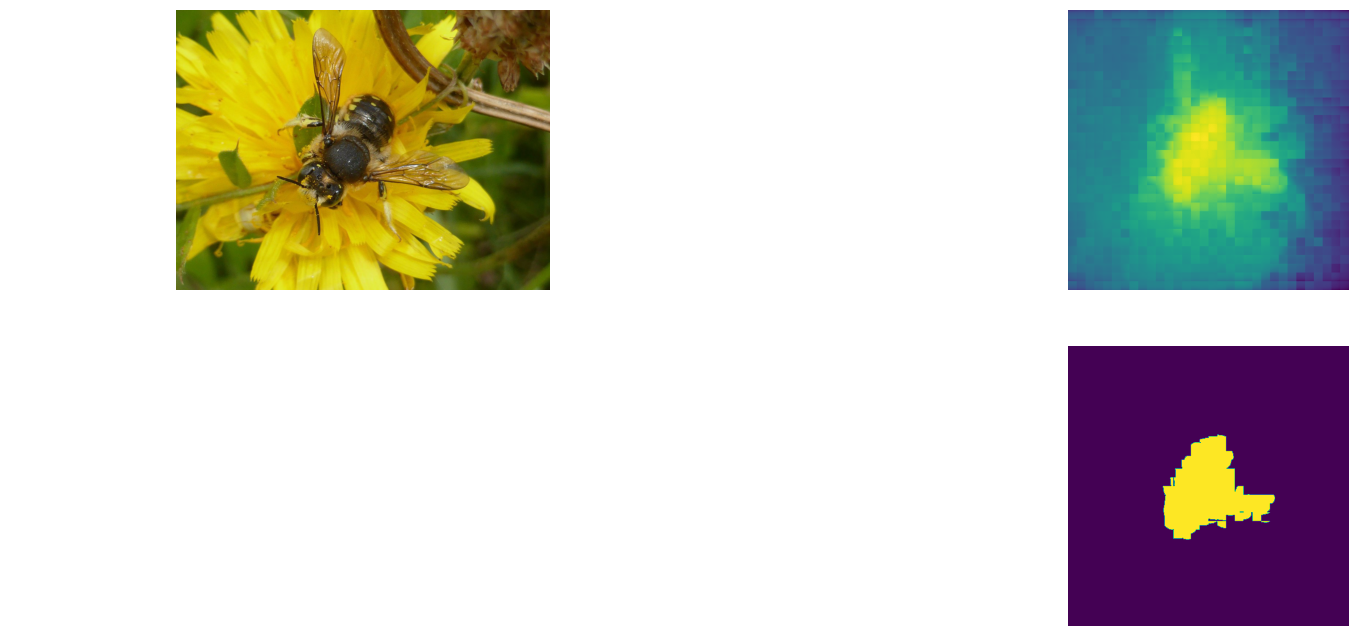

In [8]:
from torch import nn
from utils.processors import toBinary

threshold = 0.5
# prompts = ["bee", "insect", "something can fly", "flower", "something to eat"]
prompts = ["bee"]
length = len(prompts)

# predict
with torch.no_grad():
    preds = model(img.repeat(length, 1, 1, 1), prompts)[0]

# pred = nn.functional.interpolate(
#     preds[0][0].unsqueeze(1), size=(input_image.size[1], input_image.size[0]), mode="bilinear"
# )
pred = preds[0][0]

print(pred.shape)

pred_bi = toBinary(pred, threshold)


# visualize prediction
_, ax = plt.subplots(2, length + 1, figsize=(20, 8))
[a.axis("off") for a in ax.flatten()]
ax[0][0].imshow(input_image)
ax[0][1].imshow(pred)
ax[1][1].imshow(pred_bi)
# [ax[0][i + 1].imshow(preds[i][0]) for i in range(length)]
# [ax[0][i + 1].text(0, -10, prompts[i]) for i in range(length)]
# [ax[1][i + 1].imshow(preds_bi[i][0]) for i in range(length)]